In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os
import warnings

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'
# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
#Reading file
data = pd.read_csv(r"C:\Users\Balu\Desktop\Python learning\datascienceintern\temp\Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# Data Exploration

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.shape

(200, 5)

In [11]:
# Extract the relevant features for segmentation (numerical columns)
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[numerical_columns]
print(X)
cluster_column = 'Cluster'

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [13]:
# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

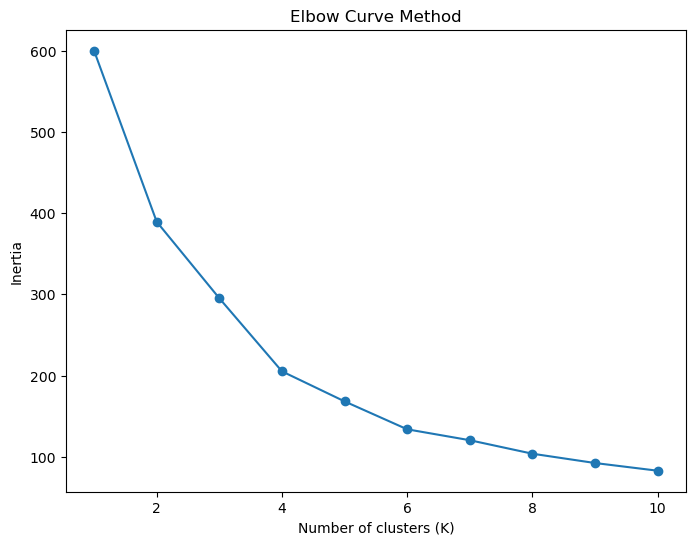

In [15]:
# Plot the Elbow curve to find the optimal number of clusters (K)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Method')
plt.show()

In [16]:
# Determine the optimal number of clusters based on the Elbow plot
optimal_k = 4

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original data
data['KMeans_Cluster'] = kmeans_clusters
print(data['KMeans_Cluster'])

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    0
197    1
198    0
199    1
Name: KMeans_Cluster, Length: 200, dtype: int32


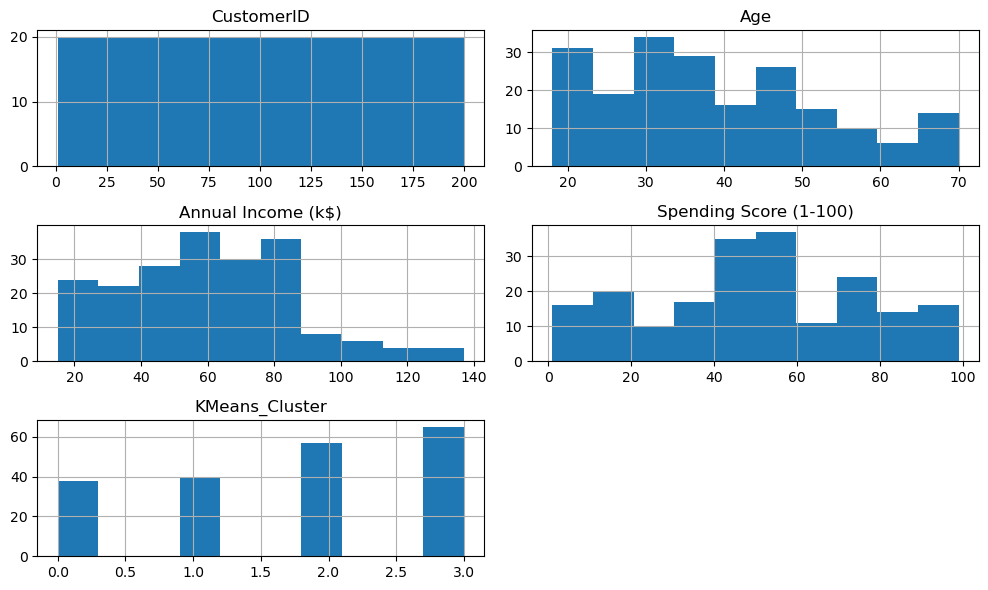

In [17]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

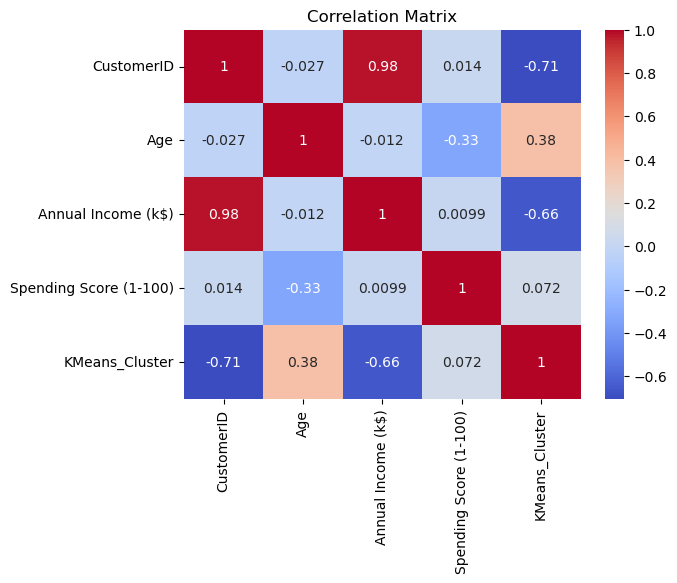

In [18]:
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

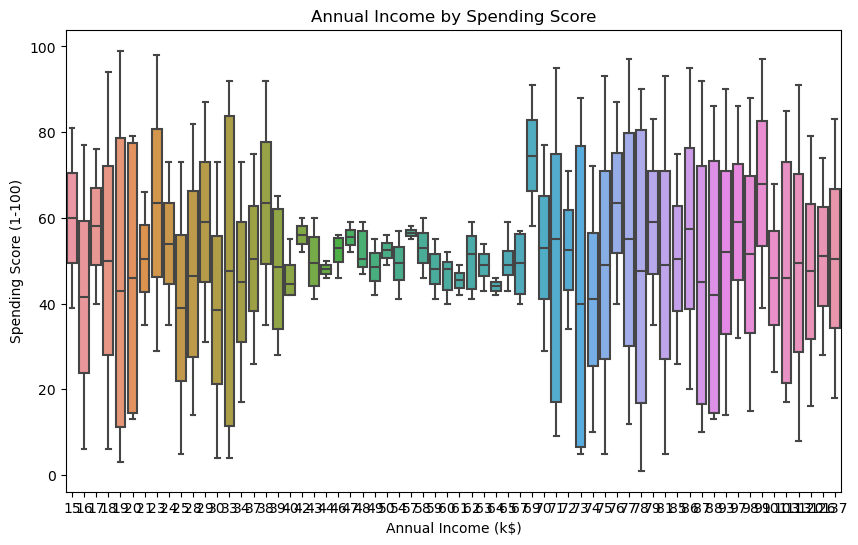

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=numerical_columns[1], y=numerical_columns[2])
plt.title('Annual Income by Spending Score')
plt.show()

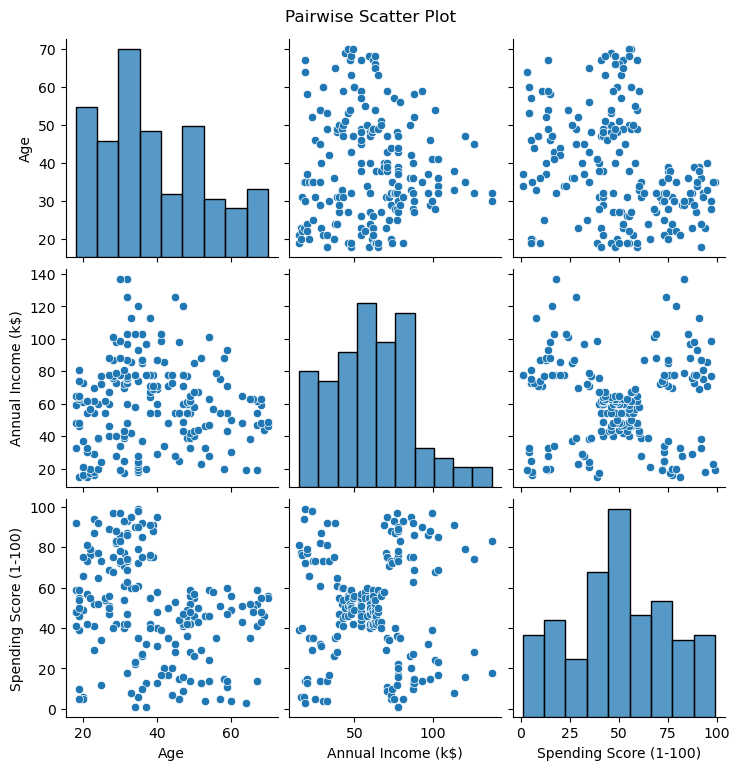

In [20]:
sns.pairplot(data, vars=numerical_columns)
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()

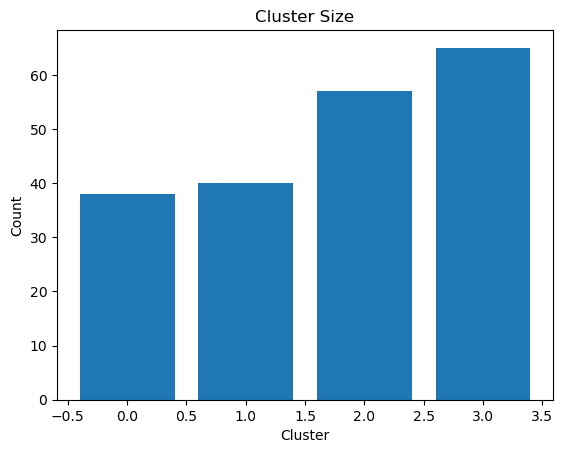

In [21]:
cluster_counts = data['KMeans_Cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Size')
plt.show()

In [22]:
# Customer Profiling
profile = data.groupby('KMeans_Cluster')[numerical_columns].mean().reset_index()
print(profile)

   KMeans_Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0               0  39.368421           86.500000               19.578947
1               1  32.875000           86.100000               81.525000
2               2  25.438596           40.000000               60.298246
3               3  53.984615           47.707692               39.969231


In [23]:
# Predictive Modeling
X_train = data[numerical_columns]
y_train = data['KMeans_Cluster']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(y_pred)

[ 2.19246817  2.6703577   1.88099066  2.67525828  2.57484012  2.6021495
  2.36073031  2.78430944  3.3387318   2.79339648  3.55224948  3.23314538
  3.21304074  2.59995126  2.44435439  2.54794502  2.55818413  2.32300396
  3.05121336  3.11247691  2.47494215  2.48592758  2.54932501  2.67227397
  2.83865381  2.60477991  2.69173821  2.61561115  2.47590029  2.41133469
  2.90046123  2.17671447  2.56744324  2.17032977  2.52150575  2.17090581
  2.27301991  2.38686574  2.0627967   1.96615922  3.15694818  2.24568686
  2.53228114  2.16766141  2.4905301   1.95660206  2.75980253  1.86167661
  1.88464536  1.95600993  2.6395881   2.14610483  1.98891794  3.04609696
  2.5797689   2.43400537  2.63609969  3.23966419  1.73390931  2.61325294
  3.31664347  1.48716768  3.14313262  2.74701706  2.96297698  1.4347074
  2.23965208  3.11235092  1.47038969  1.81810943  3.22372233  2.27720058
  2.78107714  2.8488313   2.61504721  1.50528591  2.17357019  1.94676293
  1.37888072  2.20982852  2.5823993   1.94315252  2.8

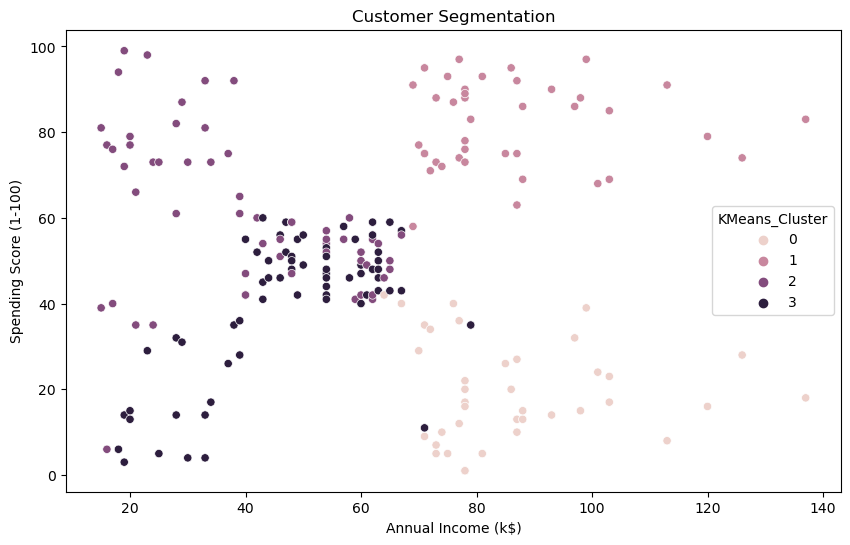

In [29]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster')
plt.title('Customer Segmentation')
plt.show()

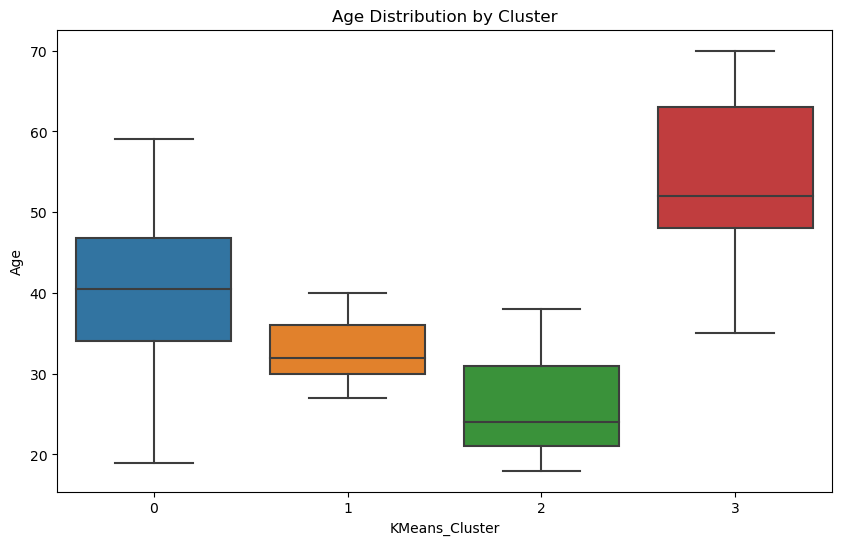

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='KMeans_Cluster', y='Age')
plt.title('Age Distribution by Cluster')
plt.show()

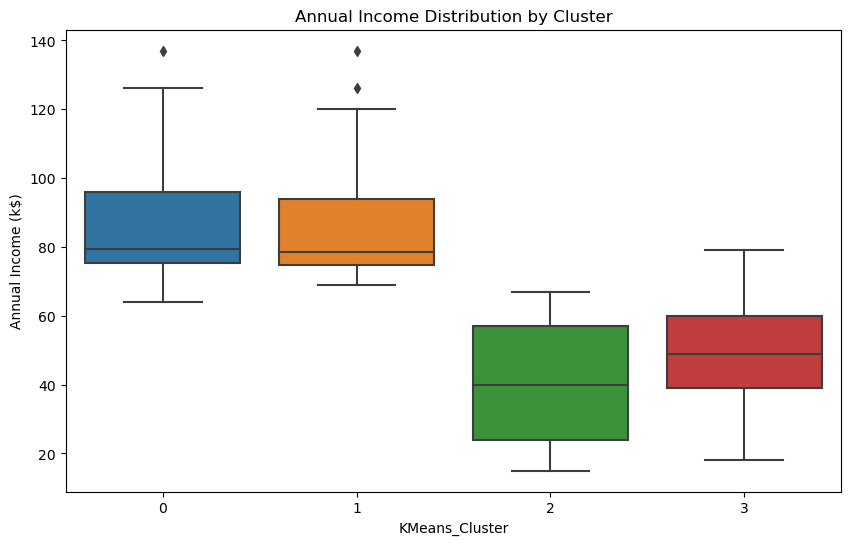

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='KMeans_Cluster', y='Annual Income (k$)')
plt.title('Annual Income Distribution by Cluster')
plt.show()

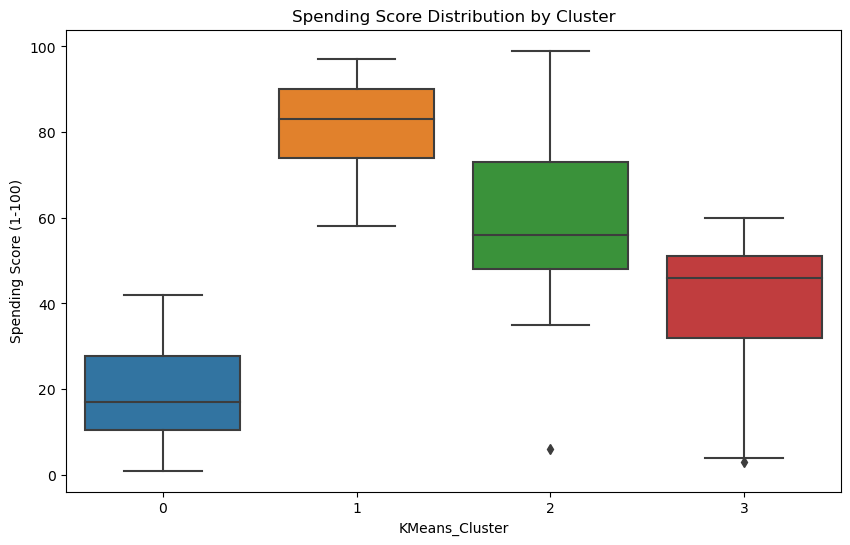

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='KMeans_Cluster', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Cluster')
plt.show()

In [1]:
print("Thank You🙏")

Thank You🙏
